# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Solution:

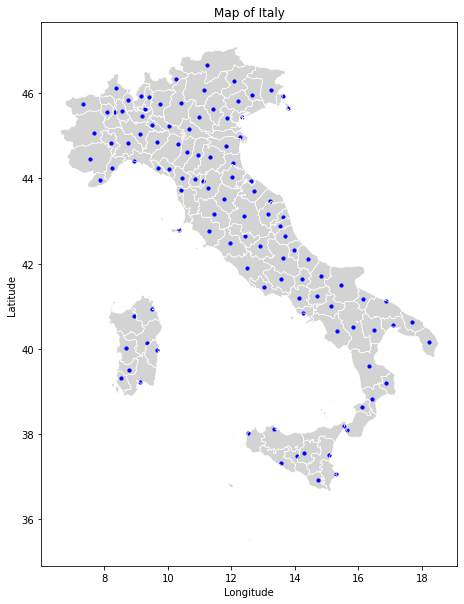

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file("provinces/ne_10m_admin_1_states_provinces.shp").to_crs(epsg=4326)
italy = world.loc[world["iso_a2"]=="IT"]
italy = italy.to_crs(epsg=4326)

map_italy = pd.read_csv('cap_prov_ita.dat', delimiter=' ', header=None, names=['x', 'y'])
geo_map_italy = gpd.GeoDataFrame(map_italy, geometry=gpd.points_from_xy(map_italy.x, map_italy.y), crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
italy.plot(ax=ax, color='lightgrey')
italy.boundary.plot(ax=ax, edgecolor='white', linewidth=0.6)
geo_map_italy.plot(ax=ax, color='blue', marker='o', markersize=10)

plt.title('Map of Italy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

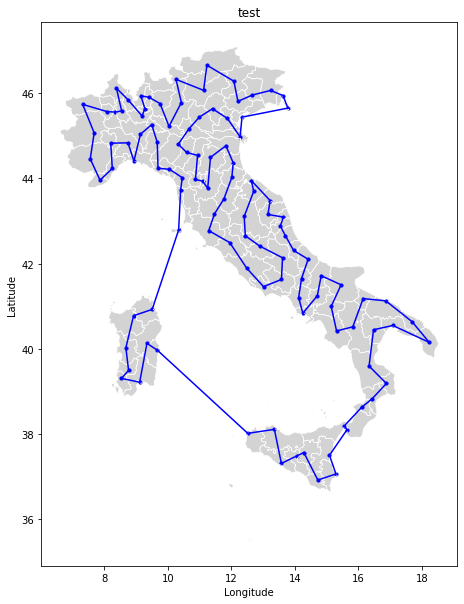

In [24]:
test_italy = pd.read_csv('test.dat', delimiter='\t', header=None)
test = test_italy.loc[0, :].values-1
test = test[:-1]
test = test.astype(int)

x = map_italy['x'].values
y = map_italy['y'].values

fig, ax = plt.subplots(figsize=(10, 10))
italy.plot(ax=ax, color='lightgrey')
italy.boundary.plot(ax=ax, edgecolor='white', linewidth=0.6)
geo_map_italy.plot(ax=ax, color='blue', marker='o', markersize=10)

for i, point in enumerate(test):
    ax.plot([x[point], x[test[i-1]]], [y[point], y[test[i-1]]], color='blue')

plt.title('test')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()